# Ejercicios 5

#### 1 Ejercicio

El fichero [oil_price.csv](./datos/oil_price_monthly.csv) contiene información mensual del precio del petróleo desde el año 1985. Abre el fichero y mira el aspecto que tiene.
* La primera columna contiene el mes y el año en formato 'yyyy-mm'.
* La segunda columna contiene el precio del barril expresado en euros.

----
* Realiza la carga del fichero utilizando la función __read_csv__ de pandas. El DataFrame creado debe tener como índices la fecha. Ha de llamarse `datos`.


In [1]:
# Sol:
import pandas as pd
datos = pd.read_csv('datos/oil_price_monthly.csv', skiprows=0, names= ['fecha', 'precio'], index_col = 0)



In [2]:
datos.head()

,precio
fecha,
1985-05,36.6383
1985-06,35.4184
1985-07,34.2709
1985-08,33.8411
1985-09,34.6826


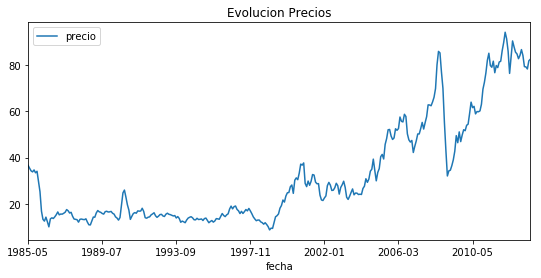

In [3]:
# Rrepresenta gráficamente la evolución de los precios
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

datos.plot(title = 'Evolucion Precios',
                          figsize=(9,4));                           # Tamaño de la figura

---
* Determinar el mes y el año donde por primera vez el precio del petróleo superó los 40 euros, los 60 y los 80 euros.
    * Primero crea un DataFrame con el mes y el año donde por primera vez el precio del petróleo superó los 40.
    * En segundo lugar crea un DataFrame con el mes y el año donde por primera vez el precio del petróleo superó los 60.
    * En tercer lugar crea un DataFrame con el mes y el año donde por primera vez el precio del petróleo superó los 80.
    * Consulta la ayuda de la función `join` para saber cómo funciona y para qué sirve. Para ello ejecuta `pd.join?`.
    * Utiliza la función `join` para unir los datos en un unico DataFrame.

La solución es 2005-03, 2007-11, 2008-05.

In [13]:
#Sol:

datos[datos.precio>40].iloc[0]

precio    40.4137
Name: 2005-03, dtype: float64

In [14]:
datos[datos.precio>60].iloc[0]

precio    62.8231
Name: 2007-11, dtype: float64

In [8]:
datos[datos.precio>80].iloc[0]

precio    80.1039
Name: 2008-05, dtype: float64

In [9]:
pd.join?

Object `pd.join` not found.


In [18]:
precio1=datos[datos.precio>40]
precio2=datos[datos.precio>60]
precio3=datos[datos.precio>80]
precio4= pd.merge(precio1,precio2, how= 'outer')
preciof= pd.merge(precio4,precio3, how= 'outer')
preciof

,precio
0,40.4137
1,41.3922
2,45.7259
3,48.2549
4,52.0461
5,52.1871
6,49.3474
7,47.8653
8,48.5179
9,52.4815


#### 2 Ejercicio

El fichero [rotterdam_rainfall.txt](./datos/rotterdam_rainfall.txt) recoge los datos de las precipitaciones diarias de la estación meteorológica de Rotterdam en 2012.

* La primera columna representa la fecha
* La segunda columna representa la cantidad de precipitaciones expresado en 0.1 mm (-1 si es menor a 0.05 mm).

__Notas__:

* Carga los datos en un DataFrame con la función __read_csv__
* El índice del DataFrame ha de ser la fecha


In [3]:
# Sol
import pandas as pd
data= pd.read_csv('datos/rotterdam_rainfall.txt', index_col = 0, names=['fecha', 'precipitaciones'])
data.head()

,precipitaciones
fecha,
20120101,207
20120102,-1
20120103,144
20120104,36
20120105,84


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 20120101 to 20121231
Data columns (total 1 columns):
precipitaciones    366 non-null int64
dtypes: int64(1)
memory usage: 5.7 KB


* Modifica los valores de la cantidad de precipitaciones a 0 cuando su valor sea -1.

In [10]:
# Sol:
def mi_fun(x):
    if(x == -1):
        return 0
    else:
        return x
    
 
z = {'precipitaciones' : mi_fun}
data = pd.read_csv('datos/rotterdam_rainfall.txt', index_col = 0, names=['fecha', 'precipitaciones'], converters = z)
data.head()

#No entiendo porque no funciona.


,precipitaciones
fecha,
20120101,207
20120102,-1
20120103,144
20120104,36
20120105,84


In [9]:
data.replace({-1: 0 }, inplace=True)
data.head()

,precipitaciones
fecha,
20120101,207
20120102,0
20120103,144
20120104,36
20120105,84


-----
* Calcula el día que ha tenido mayor cantidad de precipitación y la cantidad de precipitación

In [61]:
# Sol:
data.precipitaciones.max()


'  224'

In [27]:
data[data.precipitaciones==data.precipitaciones.max()]


,precipitaciones
fecha,
20121222,224


## References

http://nbviewer.ipython.org/github/mbakker7/exploratory_computing_with_python/tree/master/

-----
